Compression: Reduced series of length 5540 to 67 segments. Digitization: Reduced 67 pieces to 33 symbols.
-------- Config --------
The length of time series:  5540
The number of symbols:  67
The dimension of features is:  8
The number of symbols to be predicted:  1000
The parameters of classifiers:  {'var_smoothing': 0.001}
Compression: Reduced series of length 5540 to 67 segments. Digitization: Reduced 67 pieces to 33 symbols.
-------- Config --------
The length of time series:  5540
The number of symbols:  67
The dimension of features is:  8
The number of symbols to be predicted:  1000
The parameters of classifiers:  {'max_depth': 10, 'random_state': 0}
Compression: Reduced series of length 5540 to 67 segments. Digitization: Reduced 67 pieces to 33 symbols.
-------- Config --------
The length of time series:  5540
The number of symbols:  67
The dimension of features is:  8
The number of symbols to be predicted:  1000
The parameters of classifiers:  {'n_neighbors': 10}
Compression: Re

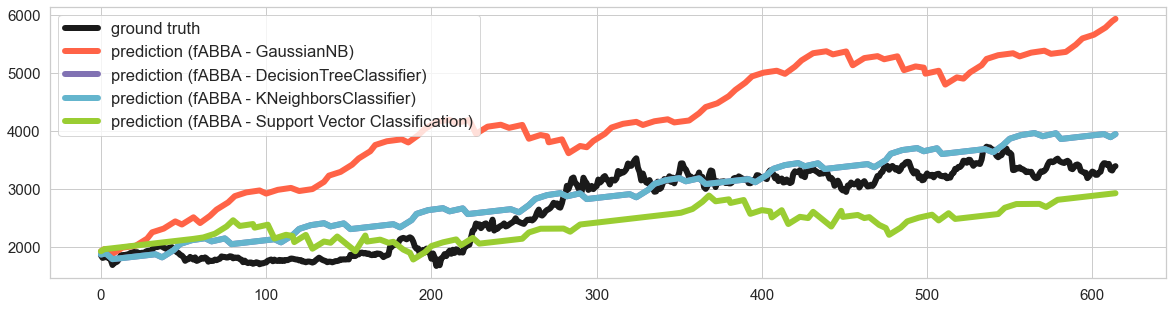

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from slearn import * 
np.random.seed(0)

time_series = pd.read_csv("docs/Amazon.csv")
ts = time_series.Close.values
length = len(ts)
train, test = ts[:round(0.9*length)], ts[round(0.9*length):]

sl = slearn(method='fABBA', ws=8, step=1000, classifier_name="GaussianNB")
sl.set_symbols(series=train, tol=0.01, alpha=0.1) 
abba_nb_pred = sl.predict(var_smoothing=0.001)
sl = slearn(method='fABBA', ws=8, step=1000, classifier_name="DecisionTreeClassifier")
sl.set_symbols(series=train, tol=0.01, alpha=0.1) 
abba_nn_pred = sl.predict(max_depth=10, random_state=0)
sl = slearn(method='fABBA', ws=8, step=1000, classifier_name="KNeighborsClassifier")
sl.set_symbols(series=train, tol=0.01, alpha=0.1) 
abba_kn_pred = sl.predict(n_neighbors=10)
sl = slearn(method='fABBA', ws=8, step=1000, classifier_name="SVC")
sl.set_symbols(series=train, tol=0.01, alpha=0.1) 
abba_svc_pred = sl.predict(C=20)
min_len = np.min([len(test), len(abba_nb_pred), len(abba_nn_pred)])

plt.figure(figsize=(20, 5))
sns.set(font_scale=1.5, style="whitegrid")
sns.lineplot(data=test[:min_len], linewidth=6, color='k', label='ground truth')
sns.lineplot(data=abba_nb_pred[:min_len], linewidth=6, color='tomato', label='prediction (fABBA - GaussianNB)')
sns.lineplot(data=abba_nn_pred[:min_len], linewidth=6, color='m', label='prediction (fABBA - DecisionTreeClassifier)')
sns.lineplot(data=abba_nn_pred[:min_len], linewidth=6, color='c', label='prediction (fABBA - KNeighborsClassifier)')
sns.lineplot(data=abba_svc_pred[:min_len], linewidth=6, color='yellowgreen', label='prediction (fABBA - Support Vector Classification)')
plt.legend()
plt.tick_params(axis='both', labelsize=15)
plt.savefig('demo1.png', bbox_inches = 'tight')
plt.show()